# $\text{ARIMA}(p,d,q)$

ARIMA stands for Auto Regressive Integrated Moving Average. The intent of $\text{ARIMA}(p,d,q)$ is to construct a stationary, $\text{ARMA}(p,q)$</br>
time series from a non-stationary time series by differencing $d$ times. Recall that an $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i}
\end{align}
$

In terms of the lag operator $L X_t = X_{t-1}, L^2 X_t = X_{t-2}, L^3 X_t = X_{t-3}, \ldots$, The $\text{ARMA}(p,q)$ model can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The difference operator is given by $\Delta = (1 - L)$. If $X_t$ is stationary after $d$ differences it follows that $\left( 1 - L \right)^d X_t$ is stationary. This is the definition of integration order.</br> 
Thus, $\text{ARIMA}(p,d,q)$ can be written as,

$
\begin{align}
\left( 1 - \sum_{i=1}^p \varphi_i L^i \right) \left( 1 - L \right)^d X_t = \left( 1  + \sum_{i=1}^q \vartheta_i L^i \right)\varepsilon_{t}
\end{align}
$

The procedure followed to determine the order and coefficients of an $\text{ARIMA}(p,d,q)$ series is as follows.

1. Use ADF test to determine if series is stationary. To determine $d$ difference series until ADF test fails.
2. User PACF/ACF analysis to determine $p$ and $q$.
3. Perform regression on differenced series to determine coefficients.

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Stats, ARIMA, Est, Test, PlotType)
from lib import (stack, comparison)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## $\text{ARIMA}(1,1,0)$ Example

In [2]:
nsample = 1000
σ = 1.0
nlags = 10

In [3]:
φ = [0.5]
d = 1
ar = ARIMA.Source.AR.create(φ=φ, npts=nsample)
arima =  ARIMA.Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Stats.Func.DIFF.apply(arima, ndiff=1)

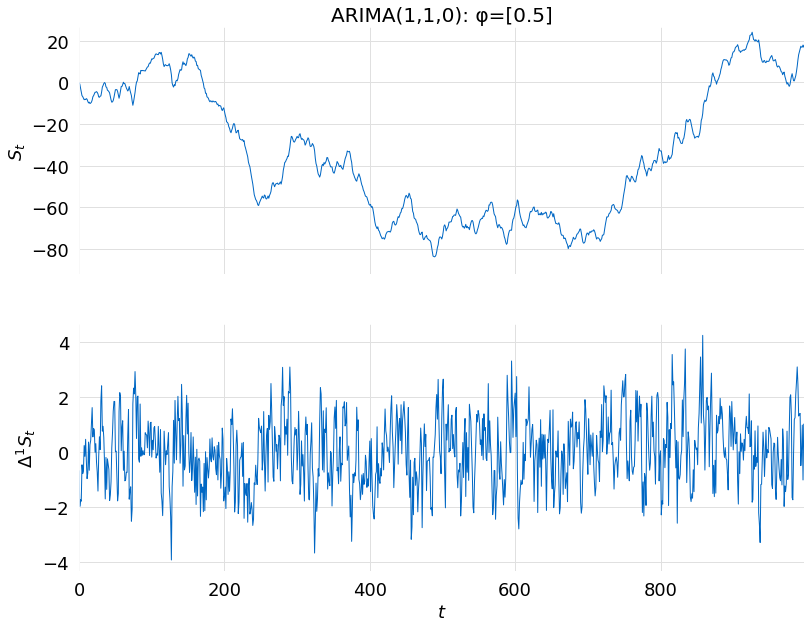

In [4]:
title=f"ARIMA(1,1,0): φ={φ}"
stack([arima, diff_1], title=title)

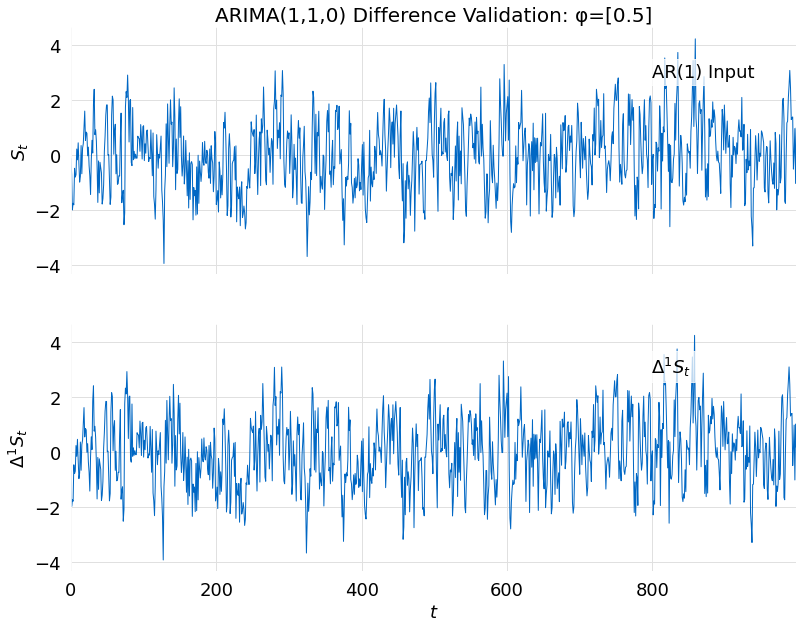

In [5]:
title = f"ARIMA(1,1,0) Difference Validation: φ={φ}"
stack([ar, diff_1], title=title, labels=[r"AR(1) Input", r"$\Delta^1 S_t$"])

In [6]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.764654 │
├────────────────┼────────────┤
│ pvalue         │   0.385375 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 998        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [7]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:20',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 1, q)-Simulation-94b7fc05-4c67-480d-872e-cbc2a00b203d',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': -0.7646542416170915, 'Label': '$t$'},
      'PValue': {'Value': 0.38537

In [8]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -16.6406      │
├────────────────┼───────────────┤
│ pvalue         │   2.81874e-28 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 998           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56798 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [9]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 1, q)-Simulation-94b7fc05-4c67-480d-872e-cbc2a00b203d',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:20',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-bc3eb1f5-c6f5-4351-99a4-e68a78b549b4',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 1},
  'Description': 'ARIMA(1) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

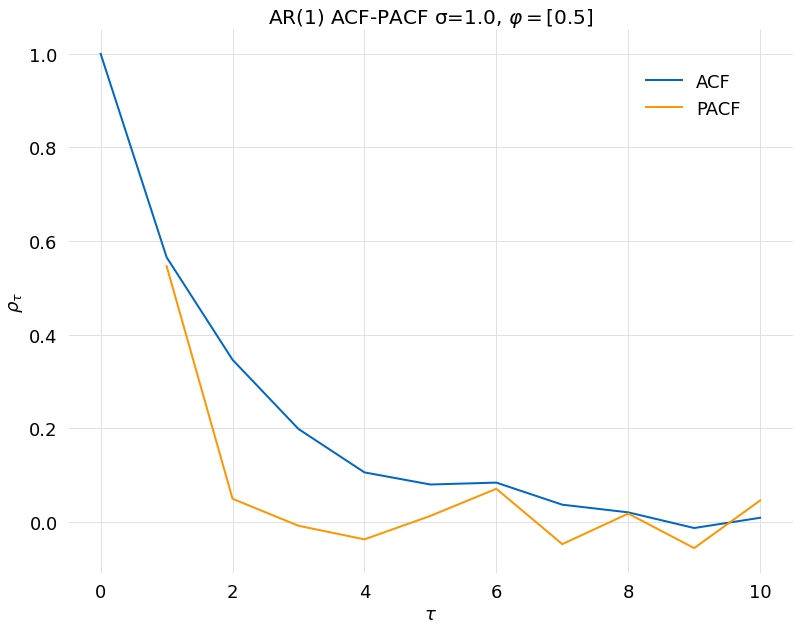

In [10]:
acf = Stats.Func.ACF.apply(diff_1, nlags=nlags)
pacf = ARIMA.Func.PACF.apply(diff_1, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [11]:
result = Est.AR.perform(diff_1, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  999
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1452.098
Date:                Sun, 19 Jun 2022   AIC                           2910.195
Time:                        13:10:21   BIC                           2924.915
Sample:                             0   HQIC                          2915.790
                                - 999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0176      0.075      0.233      0.816      -0.130       0.165
ar.L1          0.5649      0.026     21.520      0.000       0.513       0.616
sigma2         1.0713      0.049     21.705      0.000       0.975       1.168
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.49   Prob(JB):                         0.67
Heteroskedasticity (H):               1.09   Skew:                            -0.05
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(1,2,0)$ Example

In [12]:
φ = [0.75]
d = 2
ar =  ARIMA.Source.AR.create(φ=φ, npts=nsample)
arima =  ARIMA.Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Stats.Func.DIFF.apply(arima, ndiff=1)
diff_2 = Stats.Func.DIFF.apply(arima, ndiff=2)

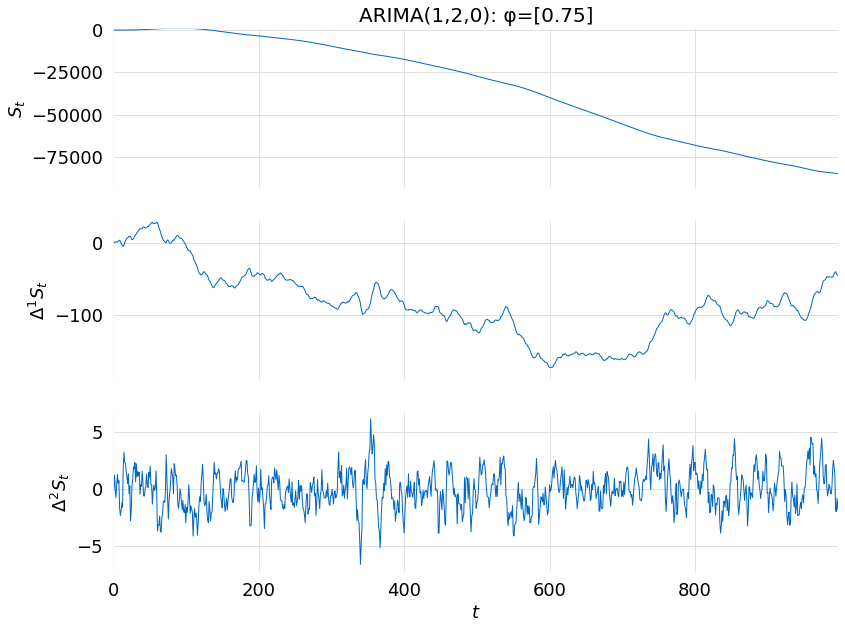

In [13]:
title = f"ARIMA(1,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

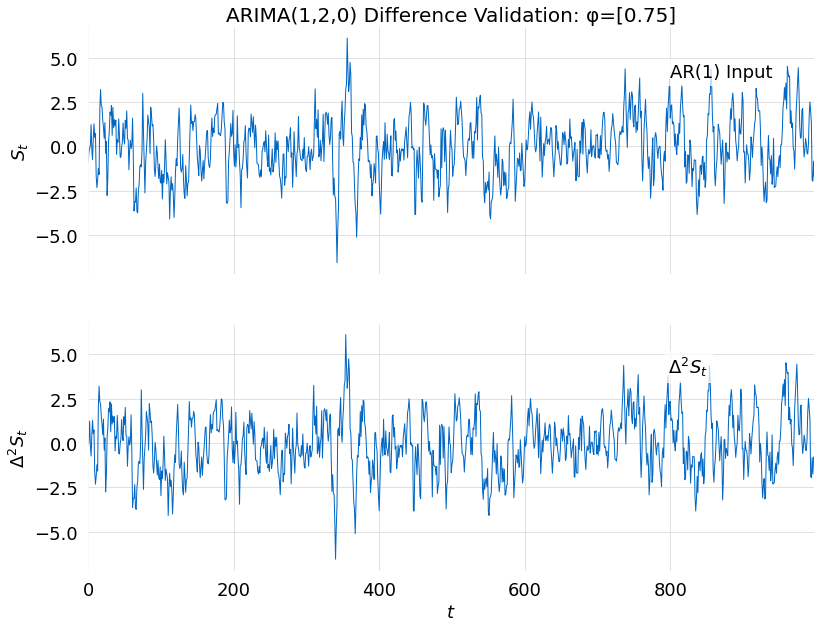

In [14]:
title = f"ARIMA(1,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(1) Input", r"$\Delta^2 S_t$"])

In [15]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.494325 │
├────────────────┼────────────┤
│ pvalue         │   0.498455 │
├────────────────┼────────────┤
│ Lags           │   2        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [16]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:21',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-7b6fb22b-d71d-497e-92ed-e06880e75dfa',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': -0.4943251317186804, 'Label': '$t$'},
      'PValue': {'Value': 0.49845

In [17]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │  -0.652853 │
├────────────────┼────────────┤
│ pvalue         │   0.432457 │
├────────────────┼────────────┤
│ Lags           │   1        │
├────────────────┼────────────┤
│ Number Obs     │ 997        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [18]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-7b6fb22b-d71d-497e-92ed-e06880e75dfa',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:21',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-ce285241-f364-44a4-9211-94be31148916',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    '

In [19]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -11.3157      │
├────────────────┼───────────────┤
│ pvalue         │   1.61237e-20 │
├────────────────┼───────────────┤
│ Lags           │   0           │
├────────────────┼───────────────┤
│ Number Obs     │ 997           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [20]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-7b6fb22b-d71d-497e-92ed-e06880e75dfa',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:21',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-4777f592-49e9-4c27-84e8-09ad9ee8ed1e',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

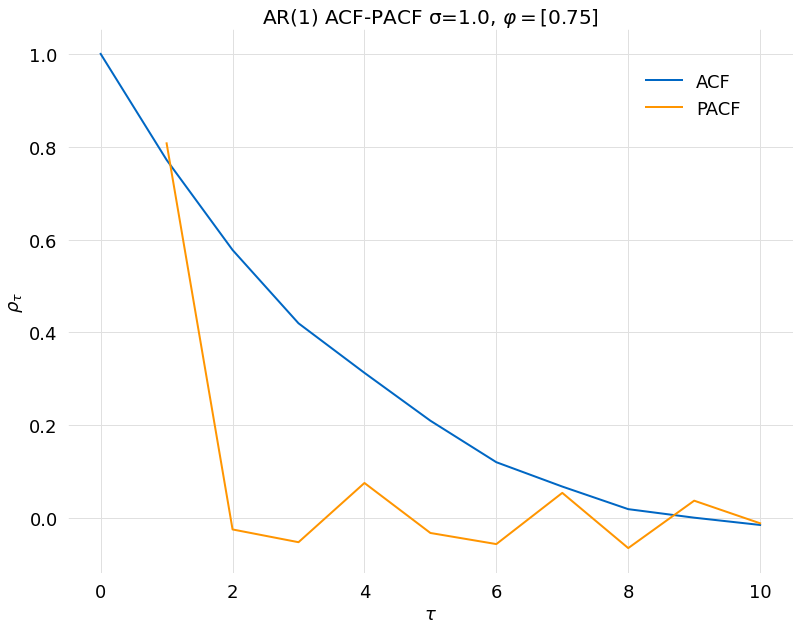

In [21]:
acf = Stats.Func.ACF.apply(diff_2, nlags=nlags)
pacf = ARIMA.Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [22]:
result = Est.AR.perform(diff_2, order=1)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1456.901
Date:                Sun, 19 Jun 2022   AIC                           2919.801
Time:                        13:10:22   BIC                           2934.518
Sample:                             0   HQIC                          2925.395
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0504      0.144     -0.349      0.727      -0.333       0.232
ar.L1          0.7711      0.019     40.125      0.000       0.733       0.809
sigma2         1.0842      0.047     23.195      0.000       0.993       1.176
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                 2.65
Prob(Q):                              0.28   Prob(JB):                         0.27
Heteroskedasticity (H):               1.02   Skew:                            -0.10
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## $\text{ARIMA}(2,2,0)$ Example

In [23]:
φ = [0.25, 0.4]
d = 2
ar =  ARIMA.Source.AR.create(φ=φ, npts=nsample)
arima =  ARIMA.Source.ARIMA_FROM_ARMA.create(arma=ar, d=d, npts=nsample)
diff_1 = Stats.Func.DIFF.apply(arima, ndiff=1)
diff_2 = Stats.Func.DIFF.apply(arima, ndiff=2)

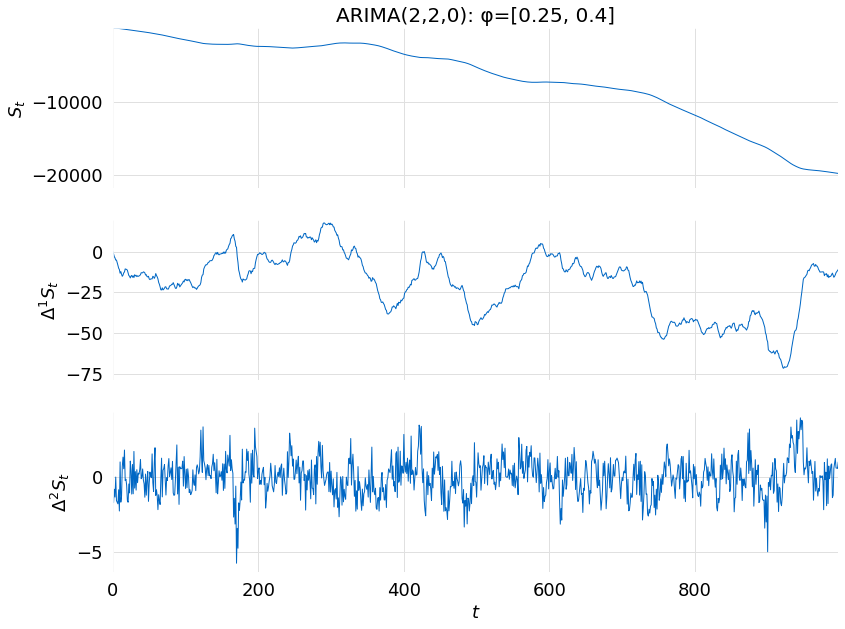

In [24]:
title = f"ARIMA(2,2,0): φ={φ}"
stack([arima, diff_1, diff_2], title=title)

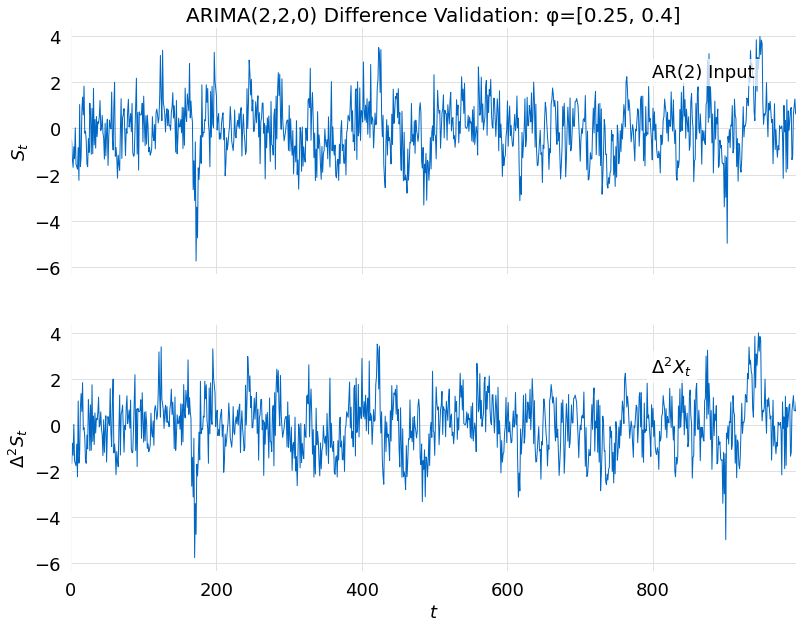

In [25]:
title = f"ARIMA(2,2,0) Difference Validation: φ={φ}"
stack([ar, diff_2], title=title, labels=[r"AR(2) Input", r"$\Delta^2 X_t$"])

In [26]:
result = Test.STATIONARITY.perform(arima)
result.summary()

╒════════════════╤════════════╕
│ Test Statistic │   1.36964  │
├────────────────┼────────────┤
│ pvalue         │   0.956805 │
├────────────────┼────────────┤
│ Lags           │   4        │
├────────────────┼────────────┤
│ Number Obs     │ 995        │
╘════════════════╧════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Passed   │
╘════════════════╧══════════════════╧══════════╛


In [27]:
arima.attrs

{'SourceType': None,
 'SourceName': None,
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:22',
 'Type': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'Name': 'ARIMA(p, 2, q)-Simulation-151fd7fc-7b49-4f14-8083-a12ee6dfeda4',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': False,
    'TestHypothesis': <TestHypothesis.LOWER_TAIL: 'LOWER_TAIL'>,
    'TestType': <Test.STATIONARITY: 'STATIONARITY'>,
    'ImplType': <_TestImpl.ADF: 'ADF'>,
    'Description': 'Stationarity Test',
    'Distribution': None,
    'Distribution Params': {},
    'TestData': [{'Status': True,
      'Statistic': {'Value': 1.369641455796893, 'Label': '$t$'},
      'PValue': {'Value': 0.9568051

In [28]:
result = Test.STATIONARITY.perform(diff_1)
result.summary()

╒════════════════╤═════════════╕
│ Test Statistic │  -1.81134   │
├────────────────┼─────────────┤
│ pvalue         │   0.0666708 │
├────────────────┼─────────────┤
│ Lags           │   3         │
├────────────────┼─────────────┤
│ Number Obs     │ 995         │
╘════════════════╧═════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Passed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [29]:
diff_1.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-151fd7fc-7b49-4f14-8083-a12ee6dfeda4',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:22',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-bd831255-f82e-4a15-aa5b-ba5450f140a3',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 999,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 1},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{1} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

In [30]:
result = Test.STATIONARITY.perform(diff_2)
result.summary()

╒════════════════╤═══════════════╕
│ Test Statistic │ -10.0532      │
├────────────────┼───────────────┤
│ pvalue         │   7.62902e-18 │
├────────────────┼───────────────┤
│ Lags           │   2           │
├────────────────┼───────────────┤
│ Number Obs     │ 995           │
╘════════════════╧═══════════════╛
╒════════════════╤══════════════════╤══════════╕
│ Significance   │   Critical Value │ Result   │
╞════════════════╪══════════════════╪══════════╡
│ 1%             │         -2.56799 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 5%             │         -1.94127 │ Failed   │
├────────────────┼──────────────────┼──────────┤
│ 10%            │         -1.61656 │ Failed   │
╘════════════════╧══════════════════╧══════════╛


In [31]:
diff_2.attrs

{'SourceType': <Source.ARIMA_FROM_ARMA: 'ARIMA_FROM_ARMA'>,
 'SourceName': 'ARIMA(p, 2, q)-Simulation-151fd7fc-7b49-4f14-8083-a12ee6dfeda4',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '19/06/2022 13:10:22',
 'Type': <Func.DIFF: 'DIFF'>,
 'Name': 'DIFF-57556926-7fcf-4315-8637-ef9f9c5bd32d',
 'SchemaIterations': None,
 'ARIMA_FROM_ARMA': {'npts': 1000,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'d': 2},
  'Description': 'ARIMA(2) from ARMA',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'DIFF': {'npts': 998,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'ndiff': 2},
  'Description': 'Difference',
  'ylabel': '$\\Delta^{2} S_t$',
  'xlabel': '$t$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': {'STATIONARITY': {'Status': True,
    'T

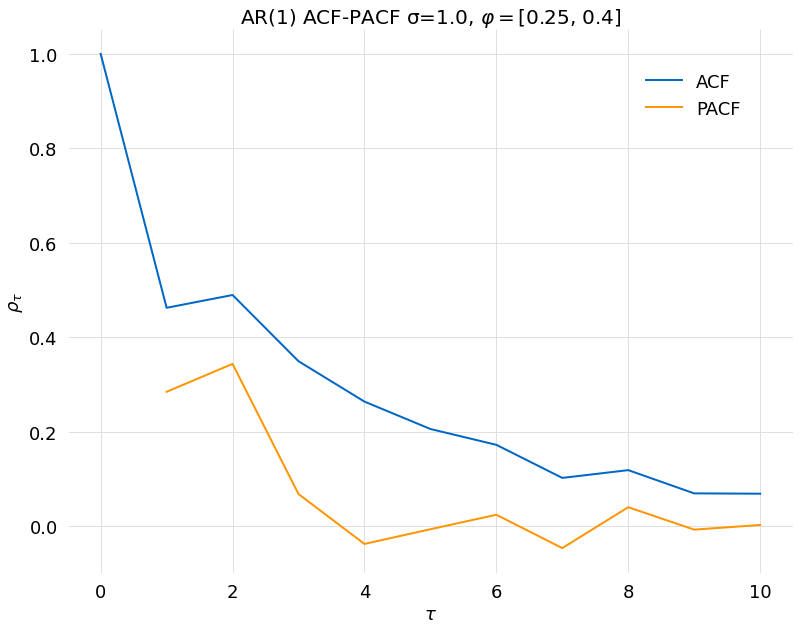

In [32]:
acf = Stats.Func.ACF.apply(diff_2, nlags=nlags)
pacf = ARIMA.Func.PACF.apply(diff_2, nlags=nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{φ}"
comparison([acf, pacf], title=title, labels=["ACF", "PACF"])

In [33]:
result = Est.AR.perform(diff_2, order=2)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                  998
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1442.620
Date:                Sun, 19 Jun 2022   AIC                           2893.240
Time:                        13:10:23   BIC                           2912.863
Sample:                             0   HQIC                          2900.699
                                - 998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.093     -0.124      0.901      -0.194       0.171
ar.L1          0.3004      0.029     10.194      0.000       0.243       0.358
ar.L2          0.3517      0.028     12.617      0.000       0.297       0.406
sigma2         1.0540      0.046     23.146      0.000       0.965       1.143
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.51   Prob(JB):                         0.35
Heteroskedasticity (H):               1.00   Skew:                             0.00
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""